<h1>CURIOSIDADES Sobre los asesinos en serie más famosos</h1>

<h1>¿Cuáles son los signos del zodiaco más peligrosos?   Te muestro la respuesta =)</h1> 

Trabajaremos con datasets de los asesinos en series más famosos de la historia

In [907]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [908]:
#Ubicamos todos los archivos de la capeta "Serial Killers" para unirlos en un solo dataset"

for dirname, _, filenames in os.walk('..\Serial Killers\Serial_killers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Serial Killers\Serial_killers\15_to_30_victim_count.csv
..\Serial Killers\Serial_killers\5_to_14_victim_count.csv
..\Serial Killers\Serial_killers\Fechas_nacimiento.xlsx
..\Serial Killers\Serial_killers\Highest_victim_count.csv
..\Serial Killers\Serial_killers\~$Fechas_nacimiento.xlsx


In [909]:
# Importamos nuestros archivos y los concatenamos
import glob
data_files = glob.glob(os.path.join('', "../Serial Killers\Serial_killers/*victim_count.csv"))

df = pd.concat(map(lambda file: pd.read_csv(file), data_files))

In [910]:
df

,Name,Country,Years active,Proven victims,Possible victims,Notes
0,Karl Denke,Germany,1900 to 1924,30,42+,Killed and cannibalized poor travelers and hom...
1,Francisco das Chagas Rodrigues de Brito,Brazil,1989 to 2003,30,42,"Pedophile who sexually abused, murdered and mu..."
2,Luis Gregorio Ramírez Maestre,Colombia,2010 to 2013,30,30,Killed motorists in various municipalities bef...
3,David Thabo Simelane,Swaziland,2000 to 2001,28,45,Sexually assaulted women he befriended in fore...
4,Zhang Jun,China,1993 to 2000,28,28,"Robbed 22 stores in several Chinese provinces,..."
...,...,...,...,...,...,...
29,Ali Asghar Borujerdi,Ottoman Empire\r\n Iraq\r\n Iran,1907 to 1934,33,33,"Known as ""Asghar the Murderer"". Killed 33 youn..."
30,Vasili Komaroff,Soviet Union,1921 to 1923,33,33,"Known as ""The Wolf of Moscow""; horse trader wh..."
31,Fernando Hernández Leyva,Mexico,1982 to 1999,33,100+,Confessed to 100 murders and six kidnappings a...
32,Ramadan Abdel Rehim Mansour,Egypt,1999 to 2006,32,32+,"Gang leader known as al-Tourbini (""The Express..."


In [911]:
#Eliminamos las notas del df porque no nos interesan
df.drop("Notes", axis=1, inplace=True)

<h2>Nacionalidad de los principales asesinos en serie</h2>

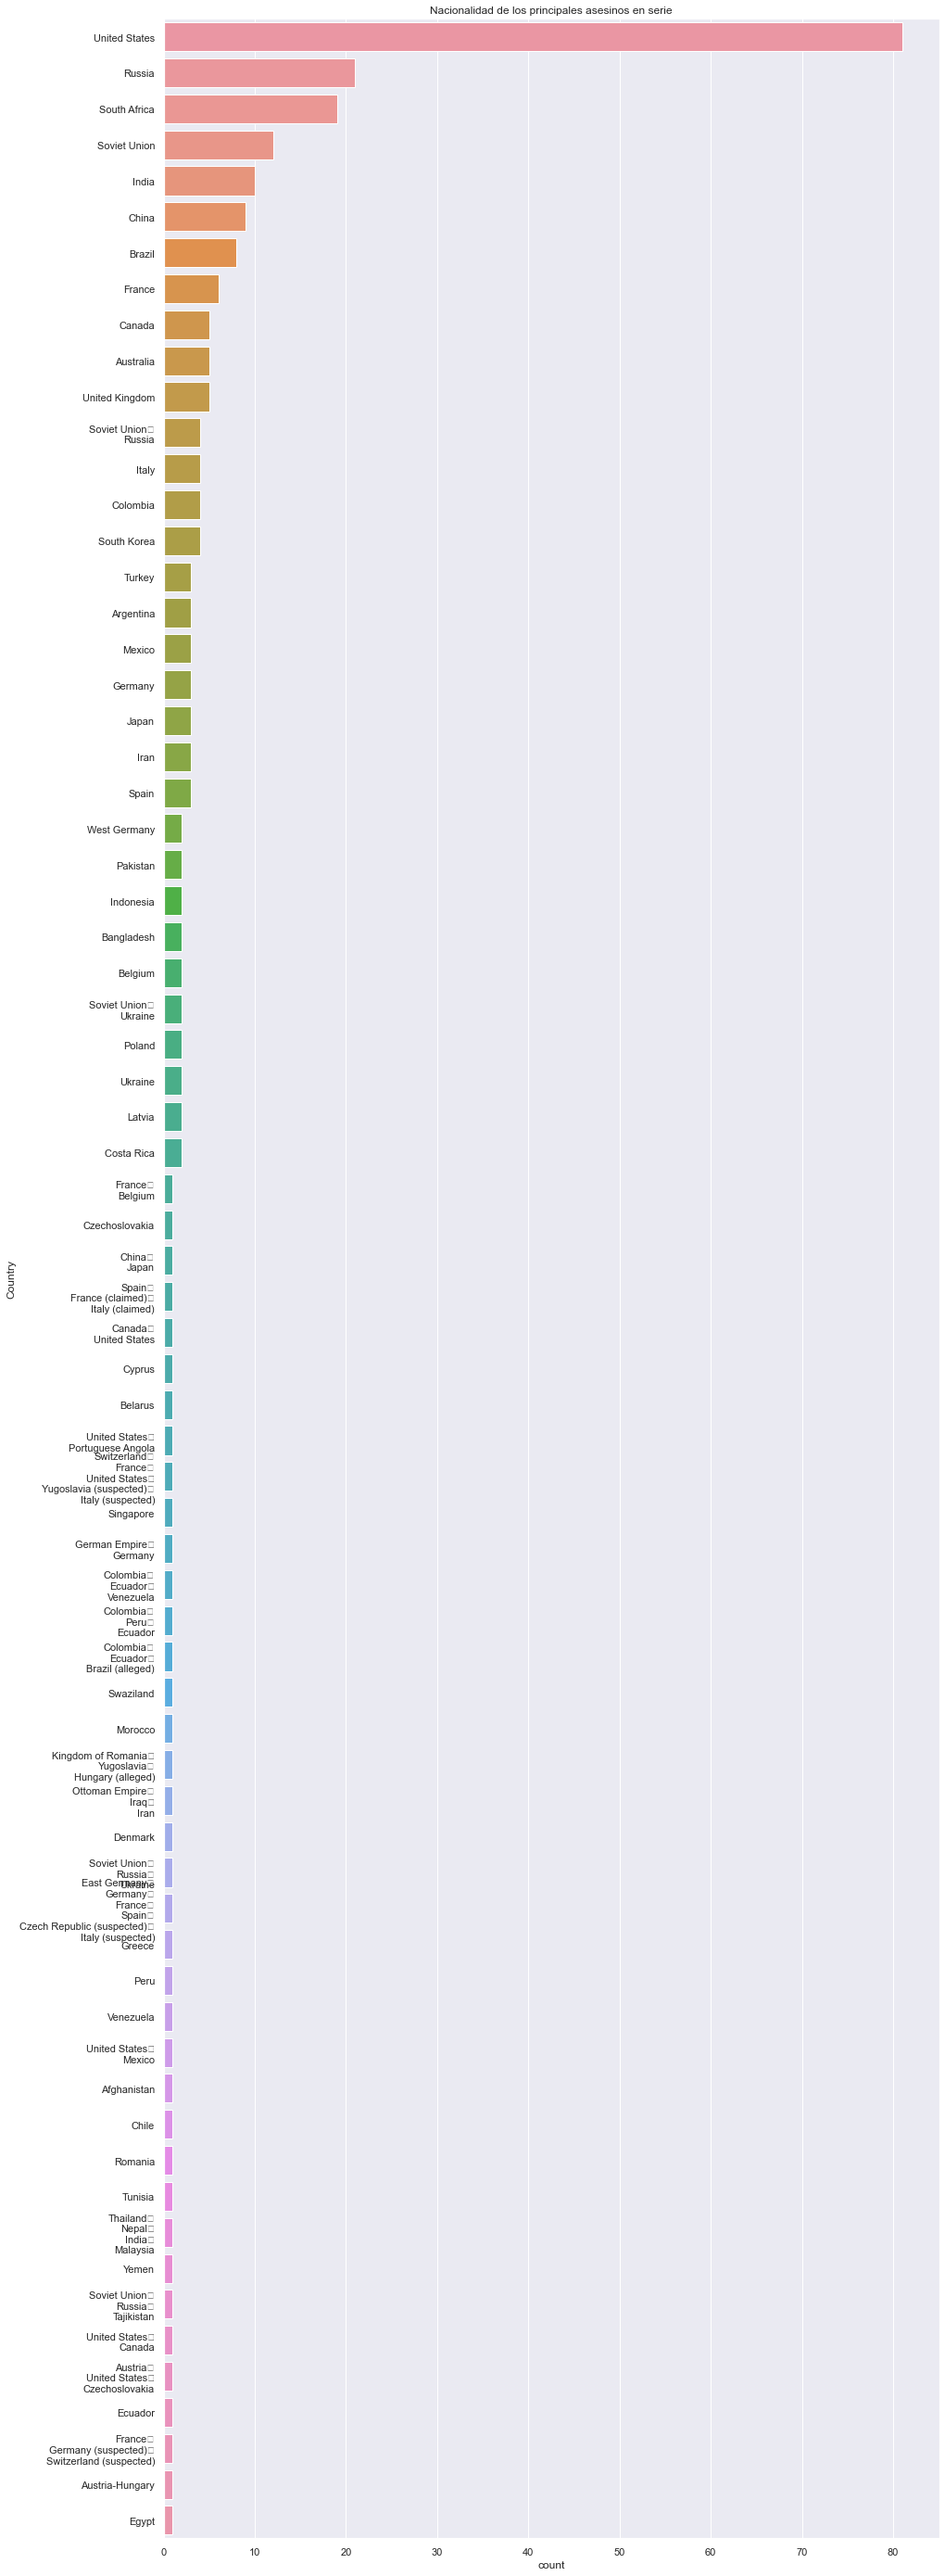

In [912]:
plt.figure(figsize=[15, 50])
p=sns.countplot(y=df["Country"],data =df, order = df['Country'].value_counts().index).set(title='Nacionalidad de los principales asesinos en serie')

<h2>Cantidad de Víctimas según países</h2>

Hay algunos valores que no son numéricos en la columna "Proven victims" ya que se encuentra un string en modo de rango, 
por lo que vamos a proceder a realizar unas correcciones según la media del rango indicado

In [913]:
df['Proven victims'].replace("11–16", int(14), inplace = True)
df['Proven victims'].replace("9–13", int(11), inplace = True)
df['Proven victims'].replace("8–15", int(12), inplace = True)
df['Proven victims'].replace("8–11+", int(10), inplace = True)

In [914]:
#Cambiamos la columna 'Proven victims' de string a numérica
df['Proven victims']= pd.to_numeric(df['Proven victims'])

In [915]:
df.groupby(['Country','Proven victims']).first()

Name  \
Country                                            Proven victims                                            
Afghanistan                                        20                                        Abdullah Shah   
Argentina                                          11                                         Robledo Puch   
                                                   13                           Francisco Antonio Laureana   
                                                   15                                  Florencio Fernández   
Australia                                          6                                     John Wayne Glover   
                                                   7                                            Ivan Milat   
                                                   8                                      Eric Edgar Cooke   
                                                   10                                        Robert Wagner   
                                                   11                                         John Bunting   
Austria\r\nUnited States\r\nCzechoslovakia         11                                      Jack Unterweger   
Austria-Hungary                                    24                                            Béla Kiss   
Bangladesh                                         7                                         Ershad Sikder   
                                                   11                                            Roshu Kha   
Belarus                                            6                                  Alexander Sergeychik   
Belgium                                            6                                          András Pándy   
                                                   11                             Marie Alexandrine Becker   
Brazil                                             11                           Francisco de Assis Pereira   
                                                   13                                       Rainbow Maniac   
                                                   14                             Marcelo Costa de Andrade   
                                                   20                                     José Paz Bezerra   
                                                   30              Francisco das Chagas Rodrigues de Brito   
                                                   39                        Tiago Henrique Gomes da Rocha   
                                                   50                              Florisvaldo de Oliveira   
                                                   71                                Pedro Rodrigues Filho   
Canada                                             8                                   Gilbert Paul Jordan   
                                                   11                                       Clifford Olson   
                                                   49                                        Willy Pickton   
Canada\r\nUnited States                            7                                  Michael Wayne McGray   
Chile                                              14                                    Julio Pérez Silva   
China                                              6                                            Gong Runbo   
                                                   10                                           Zhou Kehua   
                                                   11                                       Zhang Yongming   
                                                   15                                          Bai Baoshan   
                                                   17                                           Huang Yong   
                                                   28                                            Zhang Jun   
                                

In [916]:
#Graficamos la cantidad de víctimas por países, seleccionando aquellos donde tengan más de 20 víctimas demostradas
top_pais=df[(df["Proven victims"]>=20)]


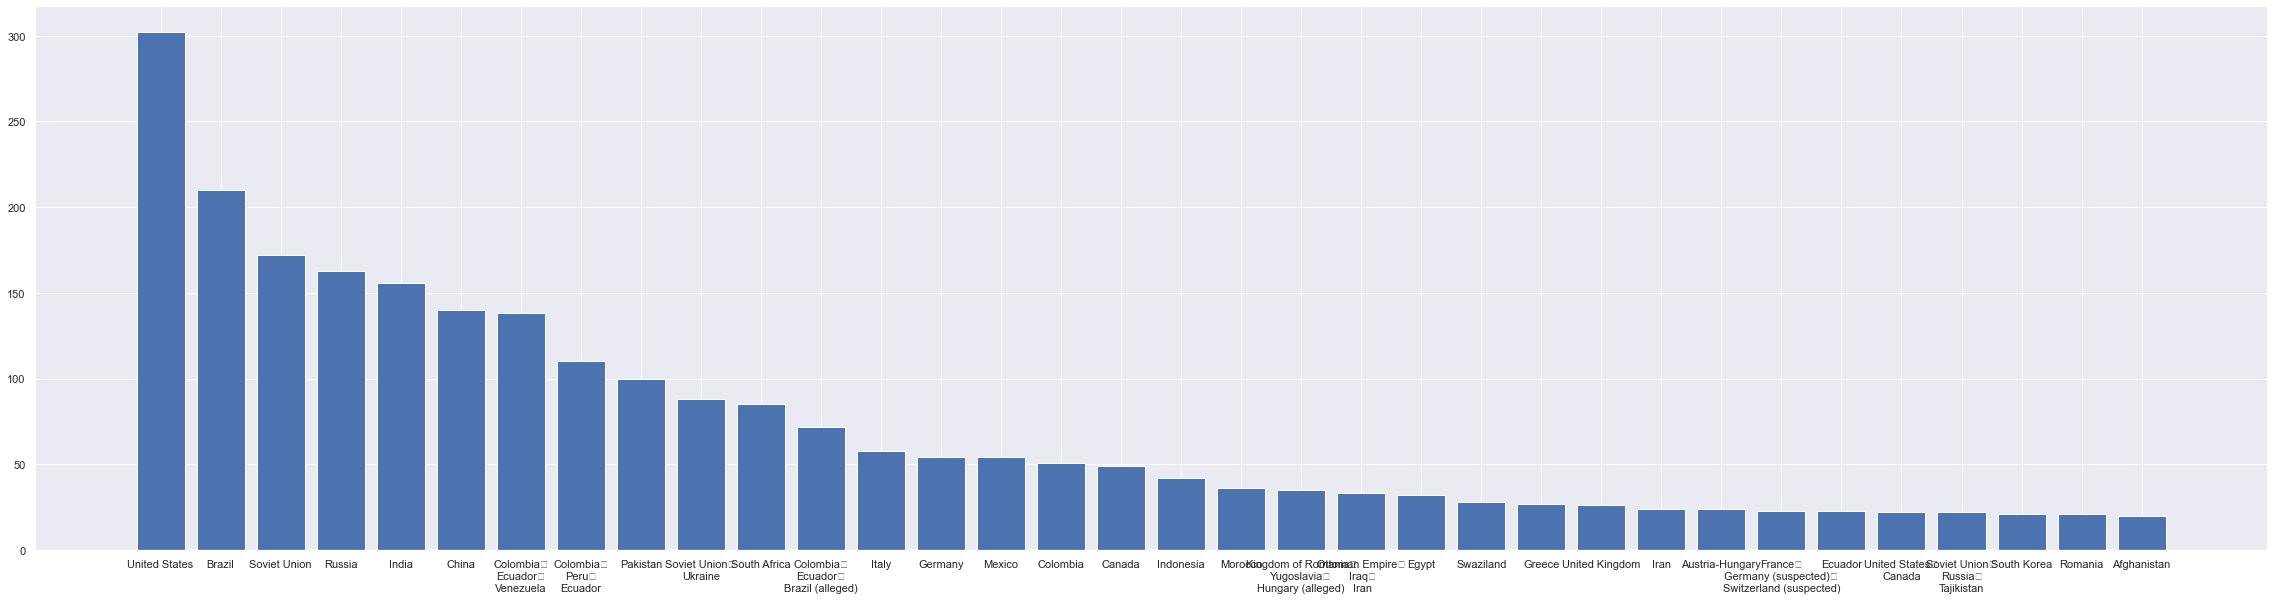

In [917]:
plt.figure(figsize=[40, 10])
plt.bar(top_pais.groupby('Country')['Proven victims'].sum().sort_values(ascending=False).index, top_pais.groupby('Country')['Proven victims'].sum().sort_values(ascending=False).values)
plt.show()

<h2>¿Cuáles son los signos del zodiaco más peligrosos?</h2>

In [918]:
#Abrimos nuestro archivo de fechas de nacimientos de cada persona
born= pd.read_excel("..\Serial Killers\Serial_killers\Fechas_nacimiento.xlsx")
born

,Name,Born
0,Karl Denke,12-02-1860
1,Francisco das Chagas Rodrigues de Brito,NaN
2,Luis Gregorio Ramírez Maestre,1980-09-30 00:00:00
3,David Thabo Simelane,NaN
4,Zhang Jun,1998-07-20 00:00:00
...,...,...
271,Ali Asghar Borujerdi,NaN
272,Vasili Komaroff,NaN
273,Fernando Hernández Leyva,1964-11-30 00:00:00
274,Ramadan Abdel Rehim Mansour,NaN


In [919]:
#Fusionamos ambos df
df= df.merge(born, left_on='Name', right_on='Name')

In [920]:
#Evaluamos los nans
df.isnull().sum()

Name                 0
Country              0
Years active         0
Proven victims       0
Possible victims    68
Born                84
dtype: int64

In [921]:
#Eliminamos las filas en las que el personaje no tenga fecha de nacimiento
df.dropna(subset=["Born"], inplace= True)

In [922]:
#Convertimos en formato fecha la columna "Born"
df['Born']= pd.to_datetime(df['Born'])

In [923]:
#Creamos una función para asignar el signo de zodiaco que le corresponde a cada persona.
from datetime import datetime
def zodiaco(x):
    x = datetime.strptime(x, '%d-%m')
    if (x >= datetime.strptime("21-03", '%d-%m')) & (x <= datetime.strptime("20-04", '%d-%m')):
        return "Aries"
    elif (x >= datetime.strptime("21-04", '%d-%m')) & (x <= datetime.strptime("20-05", '%d-%m')):
        return "Tauro"
    elif (x >= datetime.strptime("21-05", '%d-%m')) & (x <= datetime.strptime("21-06", '%d-%m')):
        return "Géminis"
    elif (x >= datetime.strptime("22-06", '%d-%m')) & (x <= datetime.strptime("21-07", '%d-%m')):
        return "Cáncer"    
    elif (x >= datetime.strptime("22-07", '%d-%m')) & (x <= datetime.strptime("23-08", '%d-%m')):
        return "Leo"
    elif (x >= datetime.strptime("24-08", '%d-%m')) & (x <= datetime.strptime("23-09", '%d-%m')):
        return "Virgo" 
    elif (x >= datetime.strptime("24-09", '%d-%m')) & (x <= datetime.strptime("22-10", '%d-%m')):
        return "Libra"
    elif (x >= datetime.strptime("23-10", '%d-%m')) & (x <= datetime.strptime("22-11", '%d-%m')):
        return "Escorpio" 
    elif (x >= datetime.strptime("23-11", '%d-%m')) & (x <= datetime.strptime("21-12", '%d-%m')):
        return "Sagitario" 
    elif (x >= datetime.strptime("22-12", '%d-%m')) & (x <= datetime.strptime("31-12", '%d-%m')):
        return "Capricornio"
    elif (x >= datetime.strptime("01-01", '%d-%m')) & (x <= datetime.strptime("20-01", '%d-%m')):
        return "Capricornio"    
    elif (x >= datetime.strptime("21-01", '%d-%m')) & (x <= datetime.strptime("21-02", '%d-%m')):
        return "Acuario"
    elif (x >= datetime.strptime("22-02", '%d-%m')) & (x <= datetime.strptime("20-03", '%d-%m')):
        return "Piscis"  
    else:
        return "Error"

In [924]:
#Creamos una nueva columna en nuestro df solo con el día y mes de nacimiento
df["Día-Mes"] = df['Born'].dt.strftime('%d-%m')


In [925]:
# Reseteamos el index
df.reset_index(drop=True, inplace=True)
df.shape

(192, 7)

In [926]:
#df['zodiaco'] = df.apply(lambda x: zodiaco(x['Día-Mes']), axis=1)
df['Zodiaco']=df["Día-Mes"].apply(zodiaco)

In [927]:
df.groupby(['Zodiaco']).size()

Zodiaco
Acuario        20
Aries          17
Capricornio    20
Cáncer         17
Escorpio       20
Géminis        17
Leo            12
Libra          14
Piscis         17
Sagitario      19
Tauro          11
Virgo           8
dtype: int64

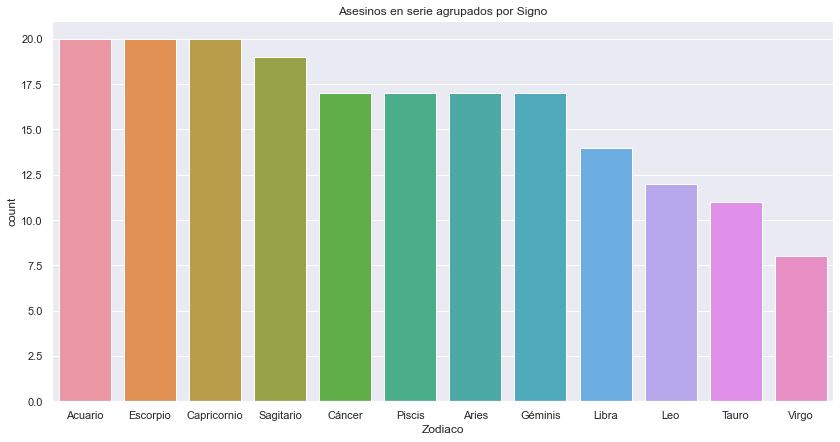

In [928]:
plt.figure(figsize=[14, 7])
p=sns.countplot(x=df["Zodiaco"],data =df, order = df['Zodiaco'].value_counts().index).set(title='Asesinos en serie agrupados por Signo')